<a href="https://colab.research.google.com/github/EhsanJabbar/Quantum-Rabi-Model-/blob/main/Variational_Study_of_SBM_ipynb_bin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.linalg import eigh
from scipy.optimize import minimize,fmin,fsolve
import numpy as np



In [ ]:
from scipy.linalg import eigh
from scipy.optimize import minimize,fmin,fsolve
import numpy as np

Delta = 1.0
omega = 1.0
g =10

def f1(x):
    A = x[0]
    B = x[1]
    a = x[2]
    b = x[3]
    E = -Delta * A * B * np.exp(-0.5 * (a - b)**2.0) + omega * ((a * A)**2.0 + (b * B)**2.0) + 2.0 * g * (A**2.0 * a - B**2.0 * b)
    Eint = E / (A**2.0 + B**2.0)
    return Eint

initial_guess = np.array([0.1, 0.5, -1, 0.1])

res1 = minimize(f1, initial_guess)
res1


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -99.99999999999517
        x: [ 5.986e+00  9.266e-07 -1.000e+01  4.001e+00]
      nit: 9
      jac: [ 9.537e-07  9.537e-07  3.815e-06  0.000e+00]
 hess_inv: [[ 6.406e-01 -6.009e-02 -3.396e-01 -1.917e-01]
            [-6.009e-02  4.975e-01  1.939e-03  8.978e-02]
            [-3.396e-01  1.939e-03  5.098e-01 -1.350e-01]
            [-1.917e-01  8.978e-02 -1.350e-01  2.992e-01]]
     nfev: 50
     njev: 10

In [ ]:
def f2(x):
    E = -g**2/omega - Delta *  (x * np.sqrt(1 - x**2) * np.exp(-2 * (g**2)/(omega**2)))
    return E

initial_guess = 0.9

res2 = minimize(f2, initial_guess)
res2

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -25.0
        x: [ 9.000e-01]
      nit: 0
      jac: [ 0.000e+00]
 hess_inv: [[1]]
     nfev: 2
     njev: 1

In [ ]:
Delta = 1.0
omega = 1.0
g = 10
sx = np.array([[0,1],[1,0]])
sz = np.array([[1,0],[0,-1]])
Is = np.eye(2)

nb = 500
a = np.diag(np.sqrt(np.linspace(1,nb,nb)), 1)
ad = a.transpose()
Ib = np.eye(nb + 1)

H = -Delta / 2 * np.kron(sx, Ib) + omega * np.kron(Is, ad @ a) + g * np.kron(sz, ad + a)

val, vec = eigh(H)

print(val[0])

-100.00062657037421


In [ ]:
f1(res1)

-5.09160949632798

In [ ]:
f2(res2)

array([-1.67667641])

minimas [-0.4999999999999274, -0.50500627089849, -0.5201013571292216, -0.5455220628754816, -0.5816918109782397, -0.6292723091497552, -0.6892576321566389, -0.7631470748522908, -0.8532759642001686, -0.9634571620125844, -1.0998978876154828, -1.2698058517171846, -1.4744680577230114, -1.709500008638338, -1.9708194659413232, -2.25586008774861, -2.5630848766097816, -2.891572868027762, -3.240774670942244, -3.610367853713199, -4.00016818373077, -4.410073970685746, -4.84003127969287, -5.290012713093111, -5.760004965320172, -6.250001863413396, -6.760000671918344, -7.290000232787357, -7.840000077452038, -8.410000024775478, -9.000000007613705, -9.610000002246128, -10.240000000635149, -10.89000000017116, -11.560000000041798, -12.250000000007674, -12.95999999999788, -13.689999999995145, -14.439999999992546, -15.209999999993347, -15.999999999991633, -16.80999999999288, -17.63999999998997, -18.48999999998612, -19.3599999999884, -20.249999999989114, -21.15999999998786, -22.08999999998494, -23.0399999999

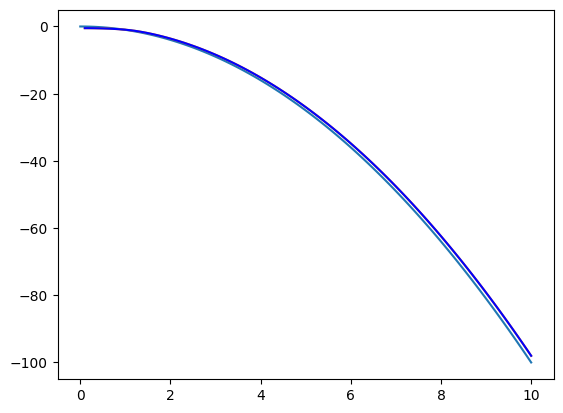

In [ ]:
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from scipy.optimize import minimize,fmin,fsolve
import numpy as np

Delta = 1.0
omega = 1.0
g = 0.0
def f1(x):
    A = x[0]
    B = x[1]
    a = x[2]
    b = x[3]
    E = -Delta * A * B * np.exp(-0.5 * (a - b)**2.0) + omega * ((a * A)**2.0 + (b * B)**2.0) + 2.0 * g * (A**2.0 * a - B**2.0 * b)
    Eint = E / (A**2.0 + B**2.0)
    return Eint

x = []
y = []
y1 = []
x1 = np.linspace(0,10,100)
y2 = -x1**2
for i in range(100):

  initial_guess = np.array([1.0, 1.0, -0.1, 0.1])
  res1 = minimize(f1, initial_guess)
  g = g + 0.1
  sx = np.array([[0,1],[1,0]])
  sz = np.array([[1,0],[0,-1]])
  Is = np.eye(2)

  nb = 100
  a = np.diag(np.sqrt(np.linspace(1,nb,nb)), 1)
  ad = a.transpose()
  Ib = np.eye(nb + 1)

  H = -Delta / 2 * np.kron(sx, Ib) + omega * np.kron(Is, ad @ a) + g * np.kron(sz, ad + a)

  val, vec = eigh(H)
  y.append(res1.fun)
  x.append(g)
  y1.append(val[0])

plt.plot(x1,y2)

plt.plot(x,y)
plt.plot(x,y, color = "b")
print("minimas",y)




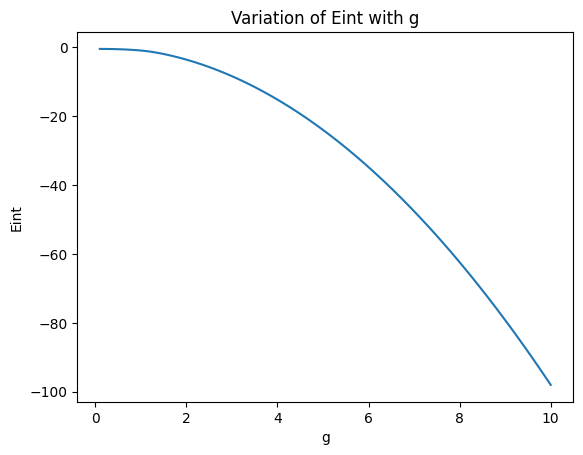

g [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.6000000000000003, 1.7000000000000004, 1.8000000000000005, 1.9000000000000006, 2.0000000000000004, 2.1000000000000005, 2.2000000000000006, 2.3000000000000007, 2.400000000000001, 2.500000000000001, 2.600000000000001, 2.700000000000001, 2.800000000000001, 2.9000000000000012, 3.0000000000000013, 3.1000000000000014, 3.2000000000000015, 3.3000000000000016, 3.4000000000000017, 3.5000000000000018, 3.600000000000002, 3.700000000000002, 3.800000000000002, 3.900000000000002, 4.000000000000002, 4.100000000000001, 4.200000000000001, 4.300000000000001, 4.4, 4.5, 4.6, 4.699999999999999, 4.799999999999999, 4.899999999999999, 4.999999999999998, 5.099999999999998, 5.1999999999999975, 5.299999999999997, 5.399999999999997, 5.4999999999999964, 5.599999999999996, 5.699999999999996, 5.799999999999995, 5.899999999999995, 5.999

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np

Delta = 1.0
omega = 1.0

def f1(x, g):
    A = x[0]
    B = x[1]
    a = x[2]
    b = x[3]
    E = -Delta * A * B * np.exp(-0.5 * (a - b)**2.0) + omega * ((a * A)**2.0 + (b * B)**2.0) + 2.0 * g * (A**2.0 * a - B**2.0 * b)
    Eint = E / (A**2.0 + B**2.0)
    return Eint

x = []
y = []
g = 0.0
for i in range(100):
    initial_guess = np.array([1.0, 1.0, -0.1, 0.1])
    res1 = minimize(lambda x: f1(x, g), initial_guess)
    g += 0.1
    x.append(g)
    y.append(res1.fun)

plt.plot(x, y)
plt.xlabel('g')
plt.ylabel('Eint')
plt.title('Variation of Eint with g')
plt.show()
print("g",x)
print("minimas",y)